<a href="https://colab.research.google.com/github/VictorPabloCristina/DataSet-Proyecto-F-CH/blob/main/Seleccion_DataSet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DataSet Mundial**



Creacion de Juego 

En la creacion de un video juego de deportes, nos solicitan crear 3 niveles de dificultad para partidos contra la maquina (facil, medio, dificil) dependiando de las habilidades y resultados reales de los jugadores inscriptos en la FIFA del ultimo mundial Qatar 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/Datasets/FIFA22_official_data.csv")
print=(df.shape)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


(array([1.796e+03, 4.517e+03, 4.381e+03, 3.547e+03, 1.620e+03, 7.570e+02,
        8.600e+01, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 19.8, 23.6, 27.4, 31.2, 35. , 38.8, 42.6, 46.4, 50.2, 54. ]),
 <BarContainer object of 10 artists>)

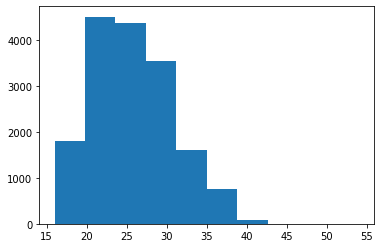

In [16]:
plt.hist(df["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa207672580>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa207672ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2076722e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa207683040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2076831c0>],
 'means': []}

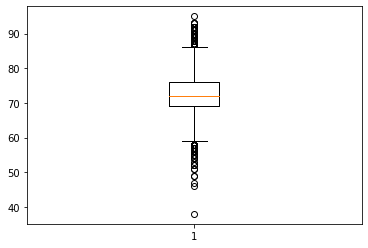

In [5]:
plt.boxplot(df["Potential"])

(0.0, 100.0)

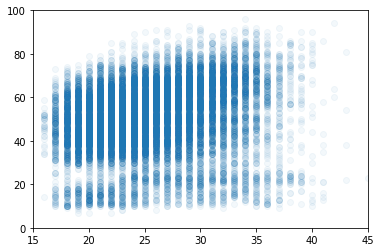

In [10]:
x=df.Age
y=df.Penalties
plt.scatter(x,y,alpha=0.05,)
plt.xlim(15,45)
plt.ylim(0,100)

<Axes: xlabel='Jersey Number', ylabel='Penalties'>

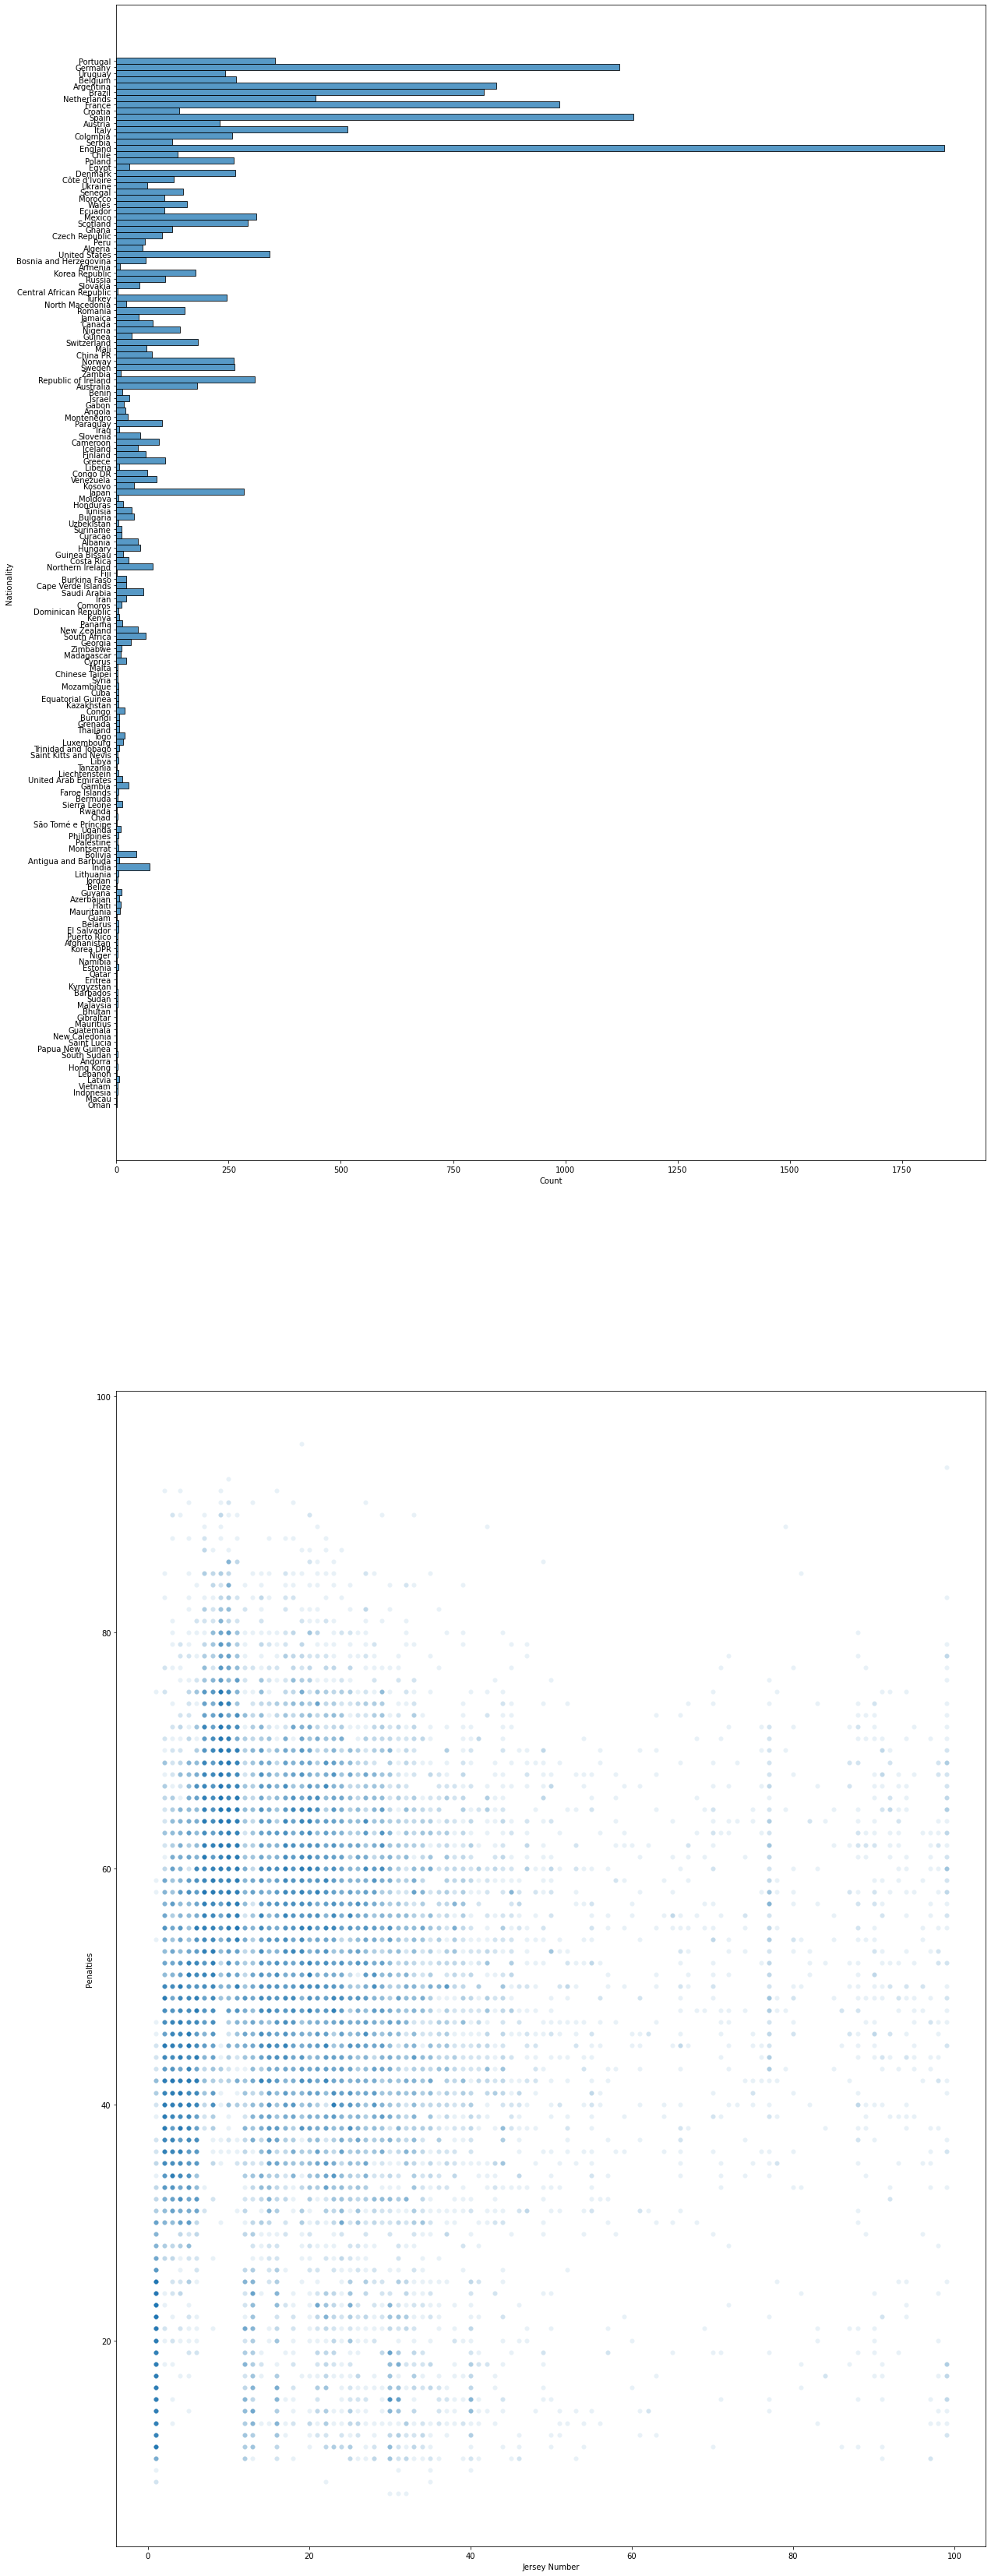

In [88]:
import matplotlib.pyplot as plt
f, axs= plt.subplots(2,1,figsize=(20,60))
sns.histplot(data=df, y="Nationality", ax=axs[0])
sns.scatterplot(data=df, x="Jersey Number", y="Penalties", alpha=0.1, ax=axs[1])

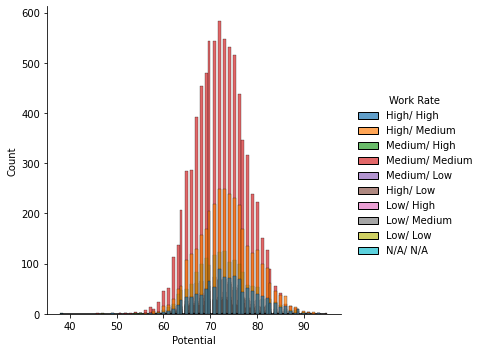

In [93]:
sns.displot(data=df, x="Potential", hue="Work Rate", alpha=0.7)

In [98]:
#df.columns
#definimos los datos mas relevantes de cada jugador par nuestro problema

In [97]:
#df[['ID','Name','Age','Nationality',"Release Clause",'Club','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position','Best Overall Rating']]

In [96]:
#df[['ID','Name','Age','Nationality',"Release Clause",'Club','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position','Best Overall Rating']].describe()

In [95]:
#df[['ID','Name','Age','Nationality',"Release Clause",'Club','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position','Best Overall Rating']].median()

In [94]:
#df[['Name','Age','Potential','Skill Moves','Position','Jersey Number','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Best Position','Best Overall Rating' ]].quantile([0.05, 0.5, 0.99])
